FP32 [8.000000e-05 4.900000e-05 1.180000e-04 3.030000e-04 7.660000e-04
 1.949000e-03 4.831000e-03 1.189700e-02 2.860200e-02 6.821100e-02
 1.597230e-01 3.714420e-01 8.518130e-01 1.942775e+00 4.383251e+00]
FX24 [6.800000e-05 3.600000e-05 7.900000e-05 1.870000e-04 4.520000e-04
 1.118000e-03 2.726000e-03 6.653000e-03 1.591400e-02 3.781300e-02
 8.833000e-02 2.050870e-01 4.697810e-01 1.070418e+00 2.413281e+00]
FX32 [9.200000e-05 3.900000e-05 8.800000e-05 2.120000e-04 5.180000e-04
 1.342000e-03 3.164000e-03 7.737000e-03 1.852300e-02 4.405500e-02
 1.029690e-01 2.391280e-01 5.478400e-01 1.248370e+00 2.814583e+00]
FP16 [9.300000e-05 4.700000e-05 1.110000e-04 2.820000e-04 7.040000e-04
 1.783000e-03 4.406000e-03 1.083200e-02 2.602700e-02 6.204400e-02
 1.452480e-01 3.377470e-01 7.744750e-01 1.766332e+00 3.985077e+00]
FX16 [6.700000e-05 3.500000e-05 7.600000e-05 1.770000e-04 4.210000e-04
 1.035000e-03 2.512000e-03 6.112000e-03 1.460300e-02 3.468500e-02
 8.101400e-02 1.880650e-01 4.307300e-01 9.81403

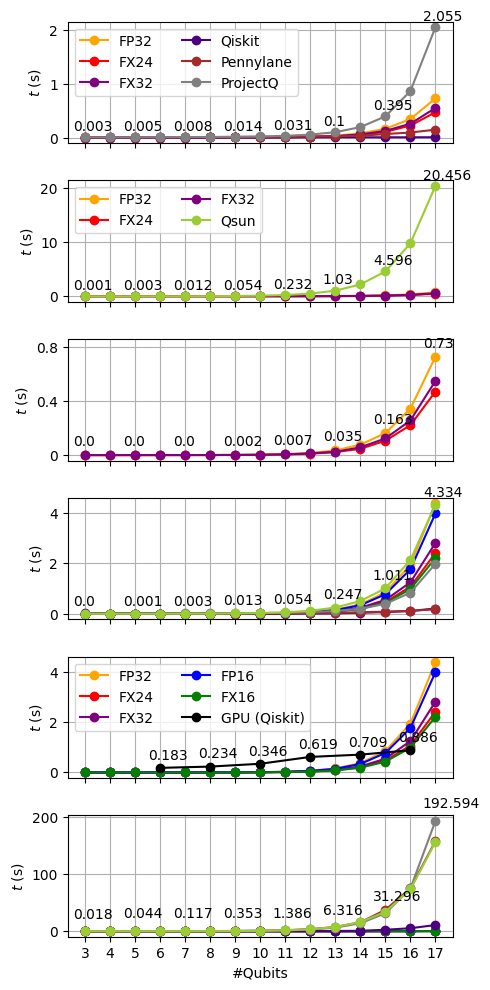

In [ ]:
import os
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

hardware_platforms = ["FP32", "FX24", "FX32"]

qubits = range(3, 18)  # Qubit range from 3 to 17 (15 lines)
depths = range(1, 11)  # Assuming depth ranges from 1 to 10 for qrc
colors = {
    'FP16': 'blue',
    'FP32': 'orange',
    'FX16': 'green',
    'FX24': 'red',
    'FX32': 'purple',
    'Qiskit': 'indigo',
    'Pennylane': 'brown',
    'ProjectQ': 'gray',
    'Qsun': 'yellowgreen'
}


fig, axs = plt.subplots(6, 1, figsize=(5, 10))


for platform in ['FP32', 'FX24', 'FX32']:
    mse_file = f"../time/FPGA_QRC/{platform}/time/{platform}_10_Time.txt"
    mses = np.loadtxt(mse_file)
    axs[0].plot(qubits, mses, '-o', color = colors[platform], label=platform)
    axs[1].plot(qubits, mses, '-o', color = colors[platform], label=platform)
    axs[2].plot(qubits, mses, '-o', color = colors[platform], label=platform)
    if platform == 'FP32':
        for i in range(3, 18, 2):
            axs[2].text(i - 0.5, mses[i-3] + 0.1, np.round(mses[i-3],  3), fontsize=10, verticalalignment='center')
   
for software in ['Qiskit', 'Pennylane', 'ProjectQ']:
	mse_file = f"../time/qrc/QRC_{software}_cad114_depth10_Time.txt"
	mses = np.loadtxt(mse_file)
	axs[0].plot(qubits, mses, '-o', color = colors[software], label=software)
	if software == 'ProjectQ':
		for i in range(3, 18, 2):
			axs[0].text(i - 0.5, mses[i-3] + 0.2, np.round(mses[i-3],  3), fontsize=10, verticalalignment='center')
   
   
mse_file = f"../time/qrc/QRC_Qsun_cad114_depth10_Time.txt"
mses = np.loadtxt(mse_file)
axs[1].plot(qubits, mses, '-o', color = colors['Qsun'], label='Qsun')
for i in range(3, 18, 2):
	axs[1].text(i - 0.5, mses[i-3] + 2, np.round(mses[i-3], 3), fontsize=10, verticalalignment='center')
   






hardware_platforms = ['FP32', 'FX24', 'FX32', 'FP16', 'FX16']
j = 3
for app in (['qft', 'psr']):
	for platform in hardware_platforms:
		
		mse_file = f"../time/{app}/{app.upper()}_{platform}_Time.txt"
		mses = np.loadtxt(mse_file)
		axs[j].plot(qubits, mses[:15], '-o', color = colors[platform], label=platform)
		# if platform == 'FP32':
		#     for i in range(3, 18, 2):
		#         axs[2].text(i - 0.5, mses[i-3] + 0.1, np.round(mses[i-3],  3), fontsize=10, verticalalignment='center')
	
	for software in ['Qiskit', 'Pennylane', 'ProjectQ', 'Qsun']:
		mse_file = f"../time/{app}/{app}_{software}_cad114_Time.txt"
		mses = np.loadtxt(mse_file)
		axs[j].plot(qubits, mses, '-o', color = colors[software], label=software)
		if software == 'Qsun' and j == 3:
			for i in range(3, 18, 2):
				axs[j].text(i - 0.5, mses[i-3] + 0.5, np.round(mses[i-3],  3), fontsize=10, verticalalignment='center')
		if software == 'ProjectQ' and j == 5:
			for i in range(3, 18, 2):
				axs[j].text(i - 0.5, mses[i-3] + 30, np.round(mses[i-3],  3), fontsize=10, verticalalignment='center')
	j += 2
	

	
import h5py
import numpy as np
hdf5_data = []
with h5py.File('../cpgpu/qft/data_qft_qiskit_multithread_dp.h5', 'r') as h5_file:
    # Get the data from the HDF5 file for qubits 6, 8, 10, ..., 32
    hdf5_data = h5_file['qiskit'][:]
    # Select the corresponding values for qubits 6, 8, 10, ..., 16
    hdf5_selected_data = hdf5_data[:6]  # Since we only want up to qubits 16

qubits_to_extract = [6, 8, 10, 12, 14, 16]
execution_times = {}

for platform in hardware_platforms:
    path = f"../time/qft/QFT_{platform}_Time.txt"
    times = np.loadtxt(path)
    # selected_times = [times[qubit - 3] for qubit in qubits_to_extract]  # Offset by 3 (since index starts at 3 qubits)
    
    axs[4].plot(qubits, times[:15], '-o', label=f'{platform}', color = colors[platform])
    print(platform, times[:15])
axs[4].plot(qubits_to_extract, hdf5_selected_data, '-o', label='GPU (Qiskit)', color='black')
for i in range(len(qubits_to_extract)):
	axs[4].text(qubits_to_extract[i] - 0.5, hdf5_selected_data[i] + 0.5, np.round(hdf5_selected_data[i],  3), fontsize=10, verticalalignment='center')

for i in range(6):
    
    axs[i].set_ylabel(rf'$t$ (s)')
    
    axs[i].grid()
    axs[i].set_xticks(qubits)
    axs[i].set_xticklabels([])
    # axs[i].legend(ncols = 2)
axs[0].legend(loc='upper left', ncol=2)
axs[1].legend(loc='upper left', ncol=2)
axs[4].legend(loc='upper left', ncol=2)
axs[-1].set_xticklabels(qubits)
axs[-1].set_xlabel('#Qubits')
axs[2].set_yticks([0, 0.4, 0.8])
axs[2].set_yticklabels([0, 0.4,0.8])
axs[2].set_ylim(-0.04, 0.86)
# if app == 'qrc':
#     mse_file = f"../mse//{app}/{platform}/10/qrc_depth_10_MSE.txt"
plt.tight_layout()
# plt.savefig('../images/qrc_time_all3.svg')

FP32 15
FX24 15
FX32 15
FP16 16
FX16 16


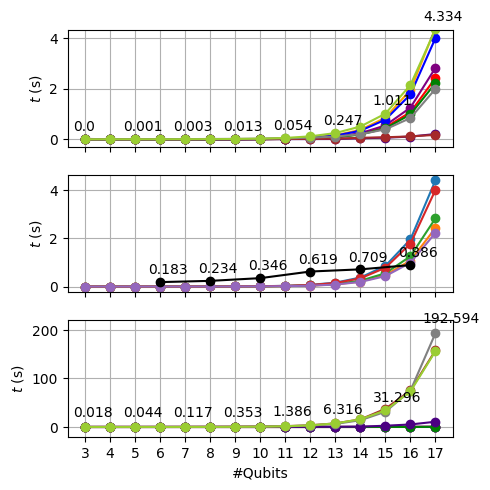

In [ ]:


#axs[0].legend(loc='upper left', ncols = 3)
for i in range(3):
    
    axs[i].set_ylabel(rf'$t$ (s)')
    
    axs[i].grid()
    axs[i].set_xticks(qubits)
    axs[i].set_xticklabels([])
axs[2].set_xticklabels(qubits)
axs[2].set_xlabel('#Qubits')



axs[0].set_yticks([0, 2, 4])
axs[0].set_yticklabels([0, 2, 4])
axs[0].set_ylim(-0.3, 4.3)

axs[2].set_yticks([0, 100, 200])
axs[2].set_yticklabels([0, 100, 200])
axs[2].set_ylim(-20, 220)
# if app == 'qrc':
#     mse_file = f"../mse//{app}/{platform}/10/qrc_depth_10_MSE.txt"
plt.tight_layout()
plt.savefig('../images/qrc_time_all2.svg')